In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import uncurl
import umap

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


unable to import ensemble methods.


In [2]:
mat = scipy.io.loadmat('../data/10x_pooled_400.mat')

In [3]:
dat = np.log10(1 + mat['data'].toarray().astype(np.float32))
genes = uncurl.max_variance_genes(dat, nbins=5, frac=0.2)
dat = dat[genes,:]
dat = dat.transpose()
(c,g) = dat.shape
print dat.shape

(400, 2747)


In [10]:
encoding_dim = 25
input_img = Input(shape=(g,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='sigmoid')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(g, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [11]:
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [12]:
autoencoder.fit(dat, dat,
                epochs=50,
                batch_size=100,
                shuffle=True,
                validation_data=(dat, dat))

Train on 400 samples, validate on 400 samples
Epoch 1/50
400/400 [==============================] - 0s 504us/step - loss: 0.2318 - val_loss: 0.2315
Epoch 2/50
400/400 [==============================] - 0s 139us/step - loss: 0.2313 - val_loss: 0.2309
Epoch 3/50
400/400 [==============================] - 0s 120us/step - loss: 0.2307 - val_loss: 0.2303
Epoch 4/50
400/400 [==============================] - 0s 123us/step - loss: 0.2301 - val_loss: 0.2298
Epoch 5/50
400/400 [==============================] - 0s 131us/step - loss: 0.2295 - val_loss: 0.2292
Epoch 6/50
400/400 [==============================] - 0s 135us/step - loss: 0.2290 - val_loss: 0.2286
Epoch 7/50
400/400 [==============================] - 0s 132us/step - loss: 0.2284 - val_loss: 0.2280
Epoch 8/50
400/400 [==============================] - 0s 133us/step - loss: 0.2277 - val_loss: 0.2273
Epoch 9/50
400/400 [==============================] - 0s 135us/step - loss: 0.2271 - val_loss: 0.2267
Epoch 10/50
400/400 [===============

In [13]:
encoded_imgs = encoder.predict(dat)

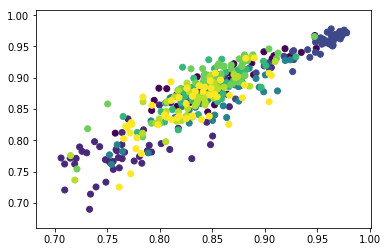

In [14]:
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1], c = mat['labels'][0])

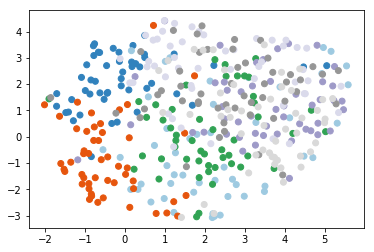

In [15]:
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(encoded_imgs)
embedding.shape
plt.scatter(embedding[:,0],embedding[:,1], c = mat['labels'][0], cmap = 'tab20c')

In [64]:
g

19848